In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

# Consumer Complaints

In [35]:
cons_comp = pd.read_csv('complaints_dec_2014.csv')

In [36]:
product = cons_comp['Product'].value_counts()

The bar graph below depicts the complaints by product type. Mortgage complaints and Debt Collection complaints are the most commonly received, at around 3000 complaints in December 2014, with Credit Reporting complaints at a close third at around 2200.

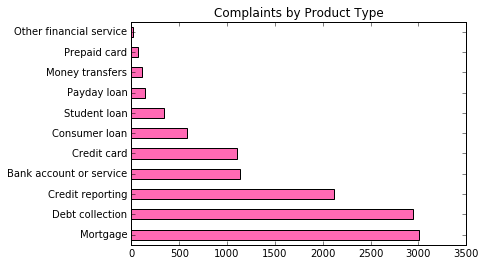

In [37]:
product.plot(kind = 'barh', color = 'hotpink', title='Complaints by Product Type')

In [38]:
companies = cons_comp['Company'].value_counts().head(10)

Bank of America received the most consumer complaints in December 2014 compared to Capitol One who received the least.

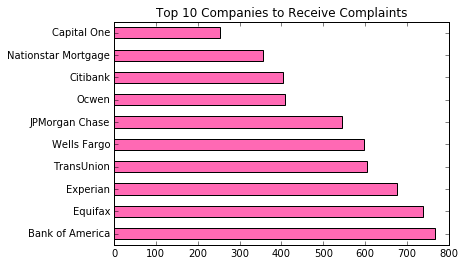

In [39]:
companies.plot(kind = 'barh', color = 'hotpink', title='Top 10 Companies to Receive Complaints')

In [40]:
response = cons_comp['Company response'].value_counts()

Seeing as the most common company response is "Closed with explanation" it is evident that the company's could benefit with more clear and concise literature, which could cut back on overall company complaints.

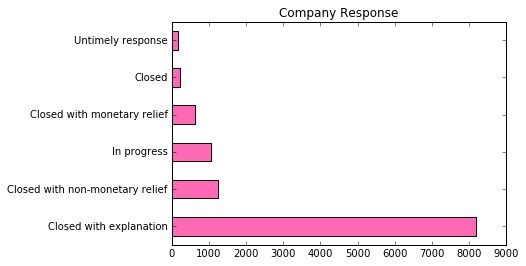

In [41]:
response.plot(kind = 'barh', color = 'hotpink', title='Company Response')

In [42]:
cons_comp['Date received'].head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [43]:
date_series = cons_comp.pop('Date received')
date_series.head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [44]:
cons_comp.index = pd.to_datetime(date_series, format="%m/%d/%Y")

In [45]:
weekday = cons_comp.index.dayofweek

In [46]:
cons_comp['weekday'] = weekday

In [47]:
cons_comp['weekday'].value_counts()

1    2580
0    2544
2    2289
3    1634
4    1446
5     543
6     507
Name: weekday, dtype: int64

In [48]:
weekly_mean = cons_comp.groupby(['weekday', 'Date sent to company']).size().groupby(level=0).mean()
weekly_mean.sort_index()

weekday
0    68.756757
1    69.729730
2    63.583333
3    54.466667
4    39.081081
5    17.516129
6    20.280000
dtype: float64

The high average number of complaints on Monday and Tuesday, and low average number of complaints for Saturday and Sunday would suggest that consumers are still experiencing issues on those days but filing complaints during actual business hours.

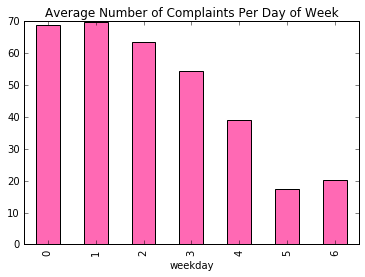

In [49]:
weekly_mean.plot(kind='bar', color='hotpink', title='Average Number of Complaints Per Day of Week')